In [1]:
import pandas as pd
# import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# COVID Dataset
source: https://github.com/CSSEGISandData/COVID-19

**Objective:**

Aggregate all the excel files from the source to a single file,<br>
then show latest information about neighbour Countries: 'France', 'Luxembourg','Italy','Spain','Portugal','Switzerland'


###  Extraction
we'll loop through all the links where the datasets are "raw", by date, up until yesterday's date is reached.

In [2]:
# using the raw source above where file name = 03-17-2020.csv
path = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/"

In [3]:
# Create a date range in a list
start = datetime.datetime.strptime("01-22-2020", "%m-%d-%Y") 
end = (datetime.datetime.now() - datetime.timedelta(days = 1)).strftime("%m-%d-%Y")

date_list = pd.date_range(start, end).strftime("%m-%d-%Y").tolist()

In [4]:
# From empty df, concatenate each file
df = pd.DataFrame(columns=["Province/State","Country/Region","Last Update",
                           "Confirmed","Deaths","Recovered","Latitude","Longitude"])
for date in date_list:
    temp = pd.read_csv(path+str(date)+'.csv') #read githbub path
    df = pd.concat([df, temp], ignore_index=True, sort=False)

del(temp)    

###  Data cleaning

In [7]:
# change column names
df.columns = ["province","country",
             "last_update","confirmed","deaths",
             "recovered","latitude","longitude"]

In [8]:
# add a date column with datetime format
def update_date(date):
    """change format date to datetime format"""
    return pd.to_datetime(date, errors='coerce', infer_datetime_format=True).date()

df['date'] = df['last_update'].apply(update_date)

In [9]:
# add a column is_neighbour
neighbours = ['France', 'Luxembourg','Italy','Spain','Portugal','Switzerland']

def is_neighbour(country):
    """Add a column where the value is 'False' if not neighbour"""
    if country not in neighbours:
        return False
    else:
        return True

df['is_neighbour'] = df['country'].apply(is_neighbour)

### Dashboard

C:\Users\Etienne\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Covid Confirmed cases for the last ten days')

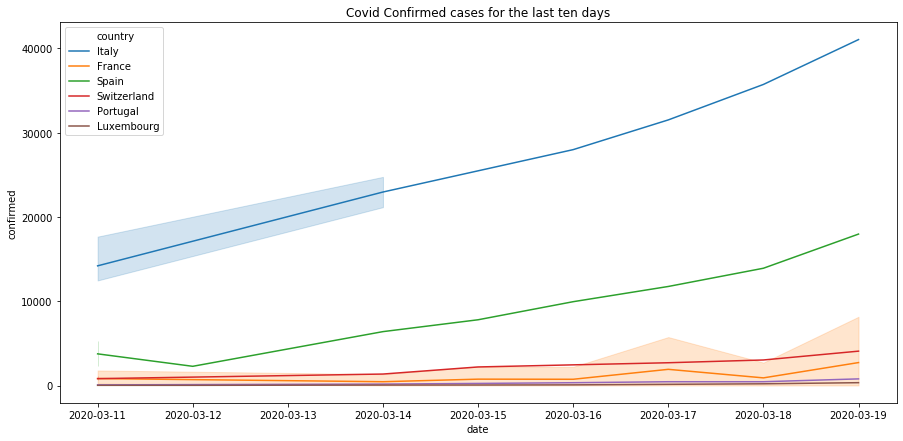

In [11]:
# plot the past 10 days
ten_days = (datetime.datetime.now() - datetime.timedelta(days = 10)).date()

plt.figure(figsize=(15,7))
sns.lineplot(data=df[(df.is_neighbour==True)&(df.date > ten_days)], 
             x='date', y='confirmed', hue='country')

plt.title(f"Covid Confirmed cases for the last ten days")

In [13]:
# summarize yesterday's data
yesterday = (datetime.datetime.today() - datetime.timedelta(days = 1)).date() #yesterday
pivot_nei = df[(df.date == yesterday)& (df.is_neighbour==True)].pivot_table(values=['confirmed','deaths','recovered'],index='country', aggfunc=sum)

Text(0.5, 1.0, 'Confirmed cases as of 2020-03-19 (┬┬_┬┬)')

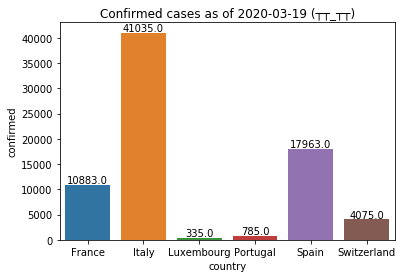

In [16]:
# barplot yesterday's figures
sns.barplot(y=pivot_nei.confirmed, x=pivot_nei.index)

# show label for each country
for i in range(len(pivot_nei.confirmed)):
    plt.text(y=pivot_nei.confirmed[i]+300, x=i, s=pivot_nei.confirmed[i], ha='center')
    

plt.title(f"Confirmed cases as of {yesterday} (┬┬_┬┬)")